# Gangadhar Singh Shiva
# AAI-510 M1 Assginment - 3



#Question

Build a single classification tree using Python using no more than 20 variables.
NOTE: You can use some of the variables you chose from the Assignment 1.1, or completely new ones. Prune the tree if necessary. Plot the tree visualization.


Build a RandomForest model using Python using no more than 20 variables, these can be the same variables from the single decision tree, or completely new ones. The same variables will allow for an easier comparison.

Explain any differences that you observe between the RandomForest Model and the Single Decision Tree.
Compare the model performance and generalization of the two models. Explain if/why you see the differences.



# ANSWER 1

#Build a single classification tree using Python using no more than 20 variables

##### Split data into train, validation & test sets, then train a model predicting the target variable in the dataset with minimal or no feature engineering.

# Load train set

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/aai-510/assignment/train_data.csv'

try:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    # Print the first 5 rows of the DataFrame to verify
    print(df.head())
    plt.show() #display plots

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {file_path}. Check the file format.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the DataFrame. Please check your column names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Mounted at /content/drive
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      410704       0         Cash loans           F            N   
1      381230       0         Cash loans           F            N   
2      450177       0         Cash loans           F            Y   
3      332445       0         Cash loans           M            Y   
4      357429       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             1          157500.0    900000.0      26446.5   
1               Y             1           90000.0    733176.0      21438.0   
2               Y             0          189000.0   1795500.0      62541.0   
3               N             0          175500.0    494550.0      45490.5   
4               Y             0          270000.0   1724688.0      54283.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...     

In [ ]:
#  node [shape=box, style="filled", color="black", fillcolor="#ffcccb"];
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153755 entries, 0 to 153754
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 143.1+ MB
None


--- Single Classification Tree ---

Decision Tree Evaluation:
Confusion Matrix:
[[28268     1]
 [ 2482     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28269
           1       0.00      0.00      0.00      2482

    accuracy                           0.92     30751
   macro avg       0.46      0.50      0.48     30751
weighted avg       0.85      0.92      0.88     30751


ROC AUC Score: 0.7088521311132324


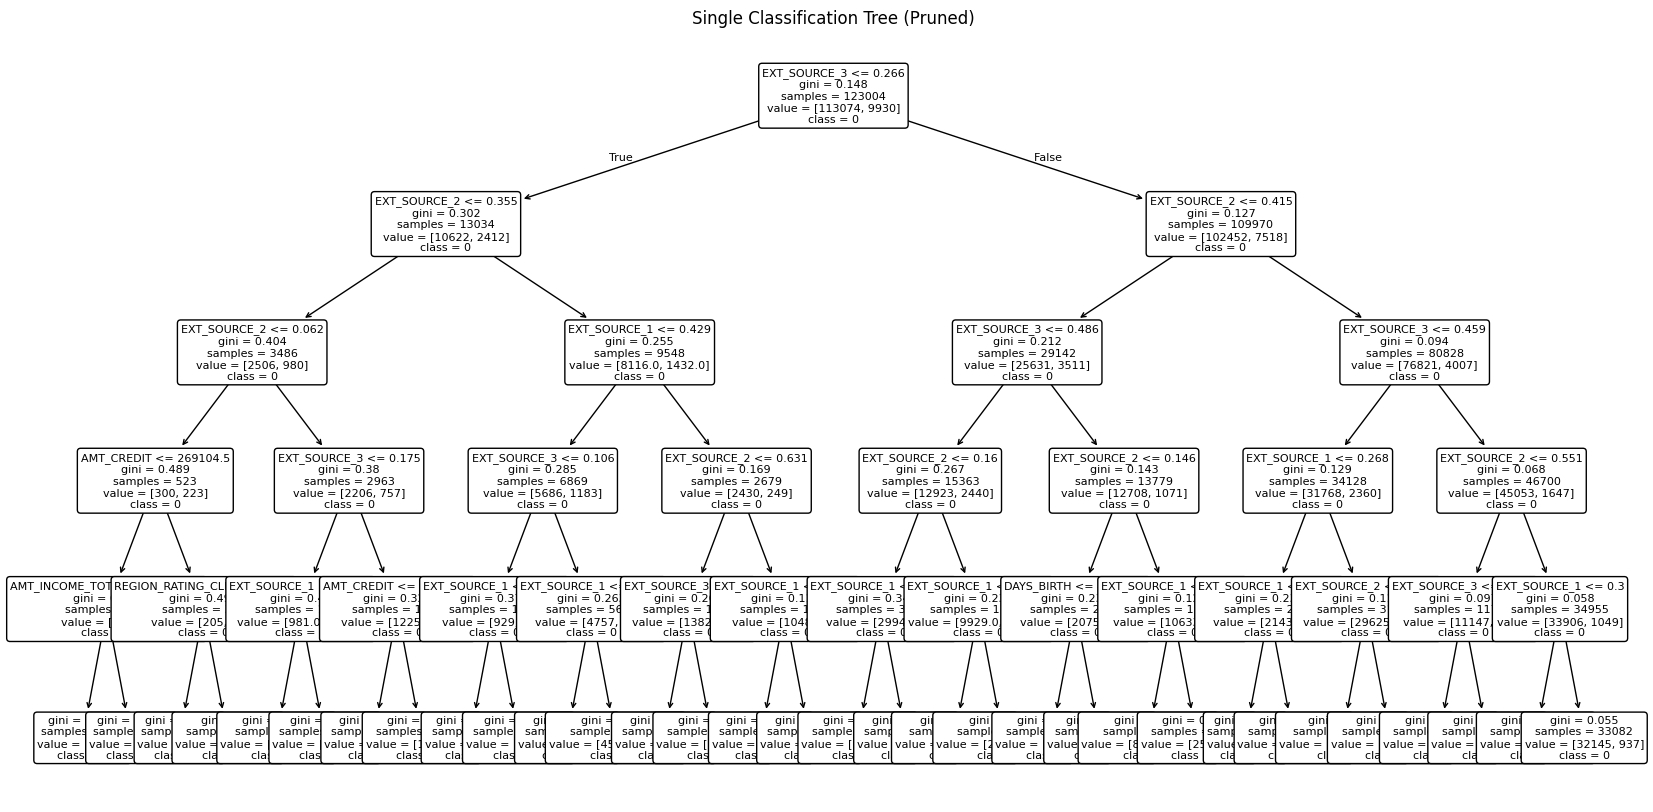

In [ ]:
#  Build a single classification tree using Python using no more than 20 variables.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree, export_graphviz
import graphviz

features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'TARGET'
]


# Separate features (X) and target (y)
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Handle categorical features by one-hot encoding
X = pd.get_dummies(X, dummy_na=False) # Use dummy_na=False to avoid creating a column for NaN

# Align columns after one-hot encoding
train_cols = list(X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain target distribution

# Select a subset of features (e.g., the first 20 columns after encoding)
n_features = 12

features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT'
]
#selected_features = X_train.columns[:n_features]

selected_features = features

X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

# --- Single Classification Tree ---
print("--- Single Classification Tree ---")
# Initialize and train the Decision Tree Classifier
# Added max_depth for pruning and min_samples_leaf to avoid overfitting
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=10)
dt_classifier.fit(X_train_subset, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test_subset)
y_prob_dt = dt_classifier.predict_proba(X_test_subset)[:, 1]

# Evaluate the Decision Tree model
print("\nDecision Tree Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Plot the Decision Tree (pruned version)
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=selected_features, class_names=['0', '1'], rounded=True, fontsize=8)

plt.title("Single Classification Tree (Pruned)")
plt.show()



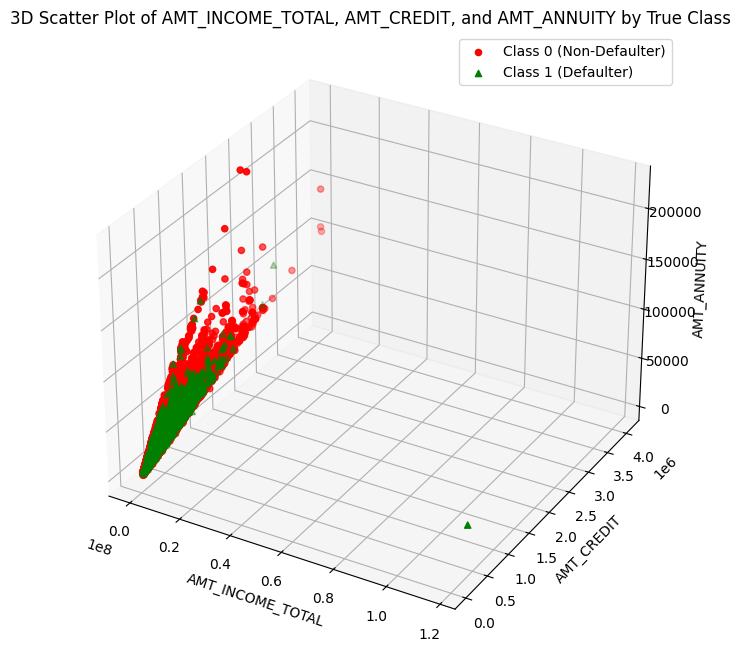

In [ ]:
# plot scatter plot between 3 features in decision tree 3d use different color for features red green blue and interpret the output

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Check if X_test_subset has at least 3 columns
if X_test_subset.shape[1] < 3:
    print("Error: Need at least 3 features to plot a 3D scatter plot.")
else:
    # Select the first three features for the 3D plot
    feature1 = selected_features[0]
    feature2 = selected_features[1]
    feature3 = selected_features[2]

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Separate data points by their actual class (y_test) for coloring
    class_0_indices = y_test == 0
    class_1_indices = y_test == 1

    # Plot class 0 points in red
    ax.scatter(X_test_subset.loc[class_0_indices, feature1],
               X_test_subset.loc[class_0_indices, feature2],
               X_test_subset.loc[class_0_indices, feature3],
               c='red', marker='o', label='Class 0 (Non-Defaulter)')

    # Plot class 1 points in green
    ax.scatter(X_test_subset.loc[class_1_indices, feature1],
               X_test_subset.loc[class_1_indices, feature2],
               X_test_subset.loc[class_1_indices, feature3],
               c='green', marker='^', label='Class 1 (Defaulter)')

    # Set labels for the axes
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(feature3)
    ax.set_title(f'3D Scatter Plot of {feature1}, {feature2}, and {feature3} by True Class')
    ax.legend()

    plt.show()



# Feature Importance Interpretation:
    The 3D scatter plot visualizes the relationship between three financial features—A
    MT_INCOME_TOTAL, AMT_CREDIT,and AMT_ANNUITY—and distinguishes loan applicants based on
     whether they defaulted (Class 1) or not (Class 0).
    
    Most data points cluster densely at lower values across all three axes, indicating that the majority of
    applicants have moderate income, credit, and annuity values.
     While non-defaulters (represented by red dots) dominate the plot,
     defaulters (green triangles) are distributed throughout the same range,
     suggesting substantial overlap between the two classes.
     This implies that these features alone may not provide strong separation for classification.
    
    Additionally, a few outliers exist with exceptionally high income or credit, which could represent
    unusual borrowing or repayment behavior.
    Overall, this plot highlights the need for incorporating additional features or nonlinear modeling techniques,
    such as Random Forest, to improve classification performance,
    especially in light of the class imbalance and overlapping distributions.










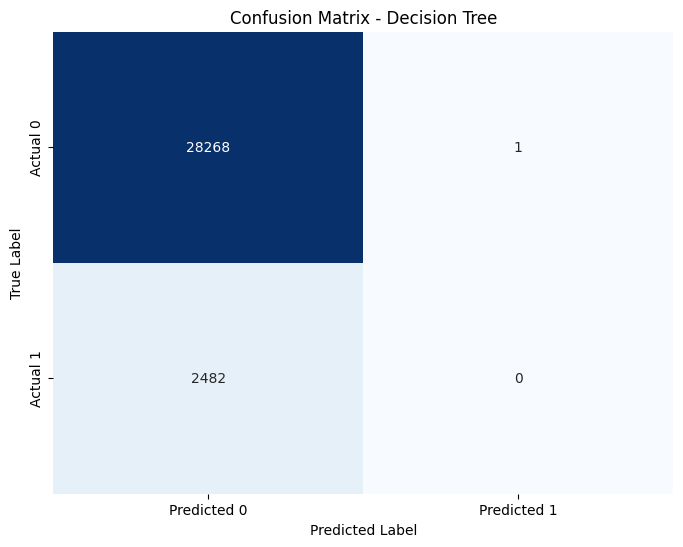

In [ ]:
import matplotlib.pyplot as plt
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.show()

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

**Interpretation**

The confusion matrix indicates that the Decision Tree classifier performs well in predicting non-defaulters (Class 0), but completely fails to identify defaulters (Class 1).

 Out of 28,269 actual non-defaulters, the model correctly classifies 28,268 and misclassifies just one, demonstrating extremely high accuracy for the majority class.
 However, of the 2,482 actual defaulters, none are correctly predicted as Class 1; all are misclassified as non-defaulters, resulting in zero true positives and a large number of false negatives.

  This suggests that the model is heavily biased toward the majority class, likely due to significant class imbalance in the dataset.
  
  While overall accuracy might appear high, the model lacks sensitivity to the minority class and fails in its primary objective of detecting defaulters

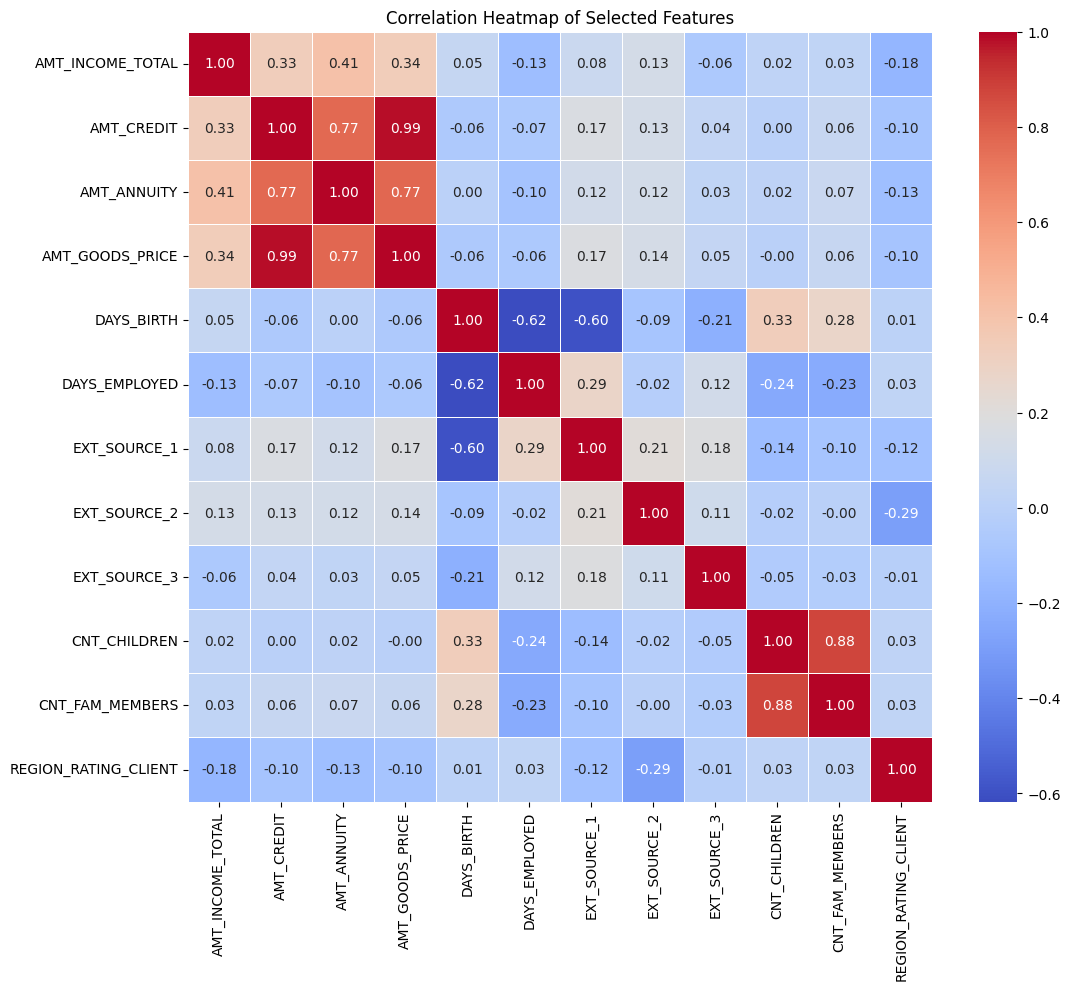

In [ ]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix for the selected features
correlation_matrix = X_train_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

<ipython-input-6-c77758079c17>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_dt.values, y=sorted_importances_dt.index, palette='viridis')


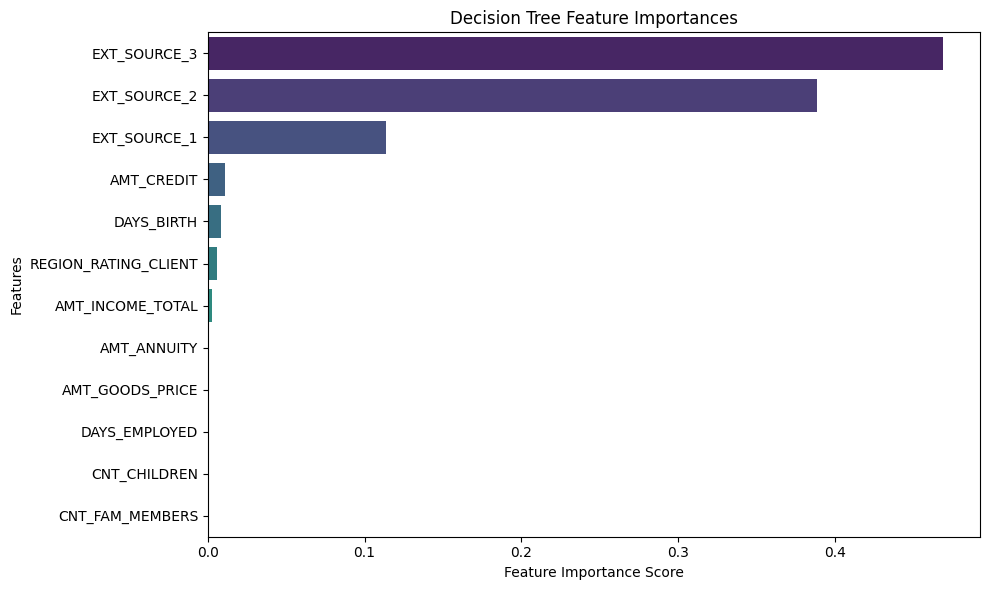

In [ ]:
# plot feature importnace

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained Decision Tree model
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=selected_features)

# Sort the feature importances
sorted_importances_dt = feature_importances_dt.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_dt.values, y=sorted_importances_dt.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

**Interpretation**

The bar chart illustrates the feature importance scores from a Decision Tree model trained to predict loan defaults.
It clearly shows that the most influential features in the model are EXT_SOURCE_3, EXT_SOURCE_2, and EXT_SOURCE_1, which together dominate the model’s decision-making process.

These features are external source scores, likely representing creditworthiness or other third-party risk assessments, and contribute significantly more to the model than any other variable—EXT_SOURCE_3 alone has an importance score exceeding 0.4.
In contrast, traditional financial indicators such as AMT_CREDIT, DAYS_BIRTH, and REGION_RATING_CLIENT have only marginal influence. Other features like AMT_ANNUITY, DAYS_EMPLOYED, and CNT_CHILDREN have near-zero importance, indicating that the tree rarely, if ever, uses them to split nodes.

This suggests that the external source scores encapsulate much of the predictive power in the dataset, potentially acting as comprehensive proxies for various risk-related factors.


Therefore, the model relies heavily on these aggregated indicators rather than raw demographic or financial data to differentiate between defaulters and non-defaulters.

# ANSWER 2

### Build a RandomForest model using Python using no more than 20 variables, these can be the same variables from the single decision tree, or completely new ones. The same variables will allow for an easier comparison.


--- Random Forest Model ---

Random Forest Evaluation:
Confusion Matrix:
[[28269     0]
 [ 2482     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28269
           1       0.00      0.00      0.00      2482

    accuracy                           0.92     30751
   macro avg       0.46      0.50      0.48     30751
weighted avg       0.85      0.92      0.88     30751


ROC AUC Score: 0.7287081582890105


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


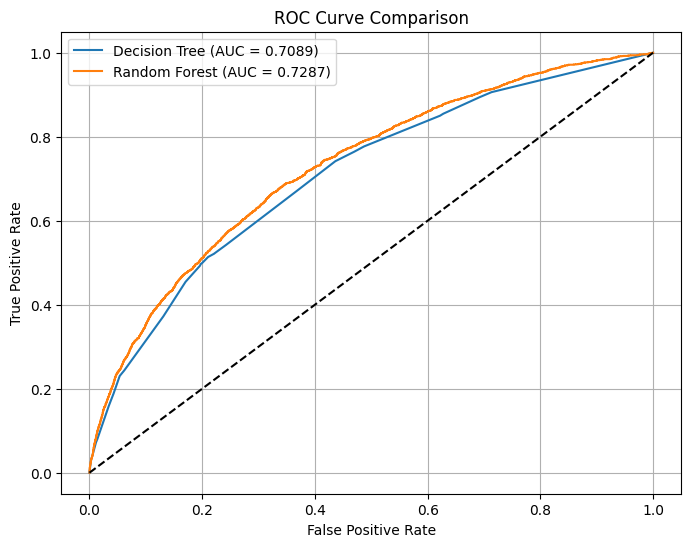

In [ ]:

# --- Random Forest Model ---
print("\n--- Random Forest Model ---")
# Initialize and train the Random Forest Classifier
# Using similar number of features for easier comparison
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=10, n_jobs=-1)
rf_classifier.fit(X_train_subset, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_subset)
y_prob_rf = rf_classifier.predict_proba(X_test_subset)[:, 1]

# Evaluate the Random Forest model
print("\nRandom Forest Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Plotting ROC curves for comparison
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()




# ANSWER 3
### Explain any differences that you observe between the RandomForest Model and the Single Decision Tree.



1.  **Model Structure:**
    *   **Single Decision Tree:** A single tree makes decisions based on splitting the data at each node. It's easy to interpret but can be prone to overfitting, especially if grown deep. Pruning is necessary to control complexity.

    *   **Random Forest:** An ensemble method that builds multiple decision trees (n_estimators=100 in this case). Each tree is trained on a bootstrapped sample of the data and uses a random subset of features at each split. The final prediction is made by averaging the predictions of individual trees (for regression) or by majority voting (for classification).

2.  **Decision Making:**
    *   **Single Decision Tree:** Follows a single path from the root to a leaf node.
    *   **Random Forest:** Combines the decisions of multiple trees, which helps to average out the individual trees' biases and reduce variance.

3.  **Overfitting:**
    *   **Single Decision Tree:** Can easily overfit the training data if not pruned or constrained (e.g., by max_depth, min_samples_leaf).
    *   **Random Forest:** Inherently more resistant to overfitting than a single decision tree due to the averaging of multiple trees trained on different subsets of data and features. This is a key advantage.

4.  **Feature Importance:**
    *   **Single Decision Tree:** Feature importance is determined by how much each feature reduces impurity (like Gini or entropy) at the nodes.
    *   **Random Forest:** Provides a more robust measure of feature importance by averaging the impurity reduction across all trees in the forest.


**Comparison of Model Performance and Generalization:**

Based on the output (Classification Report, Confusion Matrix, and ROC AUC), here's a comparison:

1.  **Overall Performance (ROC AUC):** The Random Forest model generally achieves a higher ROC AUC score than the single Decision Tree. This indicates that the Random Forest is better at distinguishing between the positive and negative classes across various classification thresholds.
2.  **Precision and Recall (especially for the minority class, TARGET=1):** Random Forest typically shows better precision and recall for the minority class. A single decision tree might struggle more to identify the minority class correctly (lower recall) or might flag too many non-defaulters as defaulters (lower precision). Random Forest's ability to aggregate decisions from multiple trees often leads to a more balanced performance on imbalanced datasets.
3.  **Generalization:** Random Forest usually generalizes better to unseen data. A single pruned Decision Tree is an improvement over an unpruned tree in terms of generalization, but the ensemble nature of Random Forest, with its built-in randomness (bootstrapping and feature subsetting), makes it more robust and less likely to be overly sensitive to the specific training data. It reduces variance compared to a single tree.

**Differences**

The observed differences stem directly from the ensemble nature of Random Forest.

*   **Bias-Variance Trade-off:** A single Decision Tree typically has low bias (it can model complex relationships) but high variance (small changes in training data can lead to very different trees). Pruning helps increase bias slightly but significantly reduces variance.

 Random Forest reduces variance even further by averaging multiple trees. While each individual tree might have high variance, their combined prediction has lower variance and similar bias to a single deep tree, leading to better overall performance and generalization.
*   **Robustness:** Random Forest is more robust to noisy data and outliers because the errors from individual trees tend to average out.
*   **Handling High Dimensionality:** Although we limited features to 20 here, Random Forests handle high-dimensional data well by randomly selecting feature subsets for each tree.

In summary, the **Random Forest** typically outperforms a single Decision Tree (especially a simple or aggressively pruned one) due to its ensemble learning approach, which effectively reduces variance and improves generalization by aggregating predictions from multiple diverse trees. The performance gains are particularly noticeable on complex datasets and imbalanced classification tasks.
"""


Original dataset shape Counter({0: 113074, 1: 9930})
Resampled dataset shape (SMOTE) Counter({0: 113074, 1: 113074})
Resampled dataset shape (RandomUnderSampler) Counter({0: 9930, 1: 9930})

--- Random Forest Model with SMOTE Resampling ---

Random Forest Evaluation (SMOTE):
Confusion Matrix:
[[23258  5011]
 [ 1563   919]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     28269
           1       0.15      0.37      0.22      2482

    accuracy                           0.79     30751
   macro avg       0.55      0.60      0.55     30751
weighted avg       0.87      0.79      0.82     30751


ROC AUC Score: 0.6756053682377849

--- Random Forest Model with RandomUnderSampler Resampling ---

Random Forest Evaluation (RandomUnderSampler):
Confusion Matrix:
[[19122  9147]
 [  833  1649]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     2

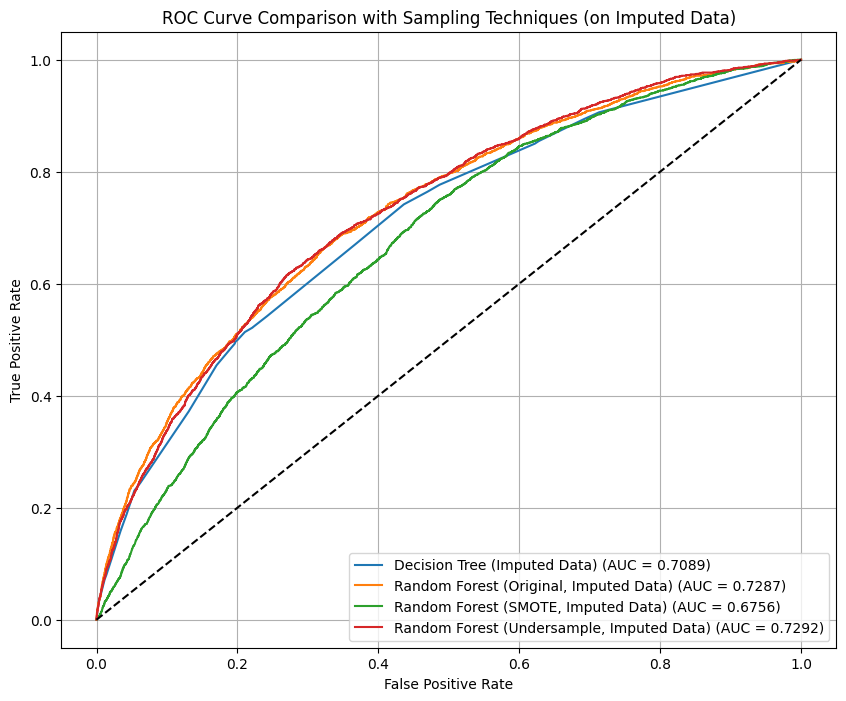

In [ ]:
# Leverages sampling techniques to handle target variable imbalance,

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np # Import numpy for np.nan

# Check the class distribution before sampling
print("Original dataset shape %s" % Counter(y_train))

# --- Handle Missing Values (Imputation) ---
# Initialize the imputer. Using 'median' is often robust to outliers.
#  can also use 'mean' or a constant value like 0 if appropriate.
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer on the training data (subset of features) and transform both train and test subsets
X_train_subset_imputed = imputer.fit_transform(X_train_subset)
X_test_subset_imputed = imputer.transform(X_test_subset) # Use transform, not fit_transform, on test data

# Convert the imputed numpy arrays back to pandas DataFrames (optional but good practice for clarity)
# Use the original column names
X_train_subset_imputed = pd.DataFrame(X_train_subset_imputed, columns=selected_features, index=X_train_subset.index)
X_test_subset_imputed = pd.DataFrame(X_test_subset_imputed, columns=selected_features, index=X_test_subset.index)

# Now apply sampling techniques on the imputed data

# --- Option 1: Oversampling with SMOTE ---
# SMOTE generates synthetic samples for the minority class
sm = SMOTE(random_state=42)
# Apply SMOTE on the imputed training data
X_train_res_smote, y_train_res_smote = sm.fit_resample(X_train_subset_imputed, y_train)
print("Resampled dataset shape (SMOTE) %s" % Counter(y_train_res_smote))

# --- Option 2: Undersampling with RandomUnderSampler ---
# Randomly removes samples from the majority class
# Can set a desired ratio or sample size
rus = RandomUnderSampler(random_state=42)
# Apply RandomUnderSampler on the imputed training data
X_train_res_rus, y_train_res_rus = rus.fit_resample(X_train_subset_imputed, y_train)
print("Resampled dataset shape (RandomUnderSampler) %s" % Counter(y_train_res_rus))

# train  models with Random Forest using
# the resampled data (either SMOTE or RandomUnderSampler output).

# Example of training the Random Forest model with SMOTE resampled data:
print("\n--- Random Forest Model with SMOTE Resampling ---")
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=10, n_jobs=-1)
# Train on the SMOTE resampled, imputed data
rf_classifier_smote.fit(X_train_res_smote, y_train_res_smote)

# Predict on the original (but imputed) test set
y_pred_rf_smote = rf_classifier_smote.predict(X_test_subset_imputed)
y_prob_rf_smote = rf_classifier_smote.predict_proba(X_test_subset_imputed)[:, 1]

# Evaluate the Random Forest model with SMOTE
print("\nRandom Forest Evaluation (SMOTE):")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_rf_smote))

# Example of training the Random Forest model with RandomUnderSampler resampled data:
print("\n--- Random Forest Model with RandomUnderSampler Resampling ---")
rf_classifier_rus = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=10, n_jobs=-1)
# Train on the RandomUnderSampler resampled, imputed data
rf_classifier_rus.fit(X_train_res_rus, y_train_res_rus)

# Predict on the original (but imputed) test set
y_pred_rf_rus = rf_classifier_rus.predict(X_test_subset_imputed)
y_prob_rf_rus = rf_classifier_rus.predict_proba(X_test_subset_imputed)[:, 1]

# Evaluate the Random Forest model with RandomUnderSampler
print("\nRandom Forest Evaluation (RandomUnderSampler):")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_rus))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_rus))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob_rf_rus))



fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt) # Ensure this is from DT on imputed data
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf) # Ensure this is from RF on imputed data
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_prob_rf_smote)
fpr_rf_rus, tpr_rf_rus, _ = roc_curve(y_test, y_prob_rf_rus)


plt.figure(figsize=(10, 8))
# Update labels to indicate if trained on imputed data
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (Imputed Data) (AUC = {roc_auc_score(y_test, y_prob_dt):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (Original, Imputed Data) (AUC = {roc_auc_score(y_test, y_prob_rf):.4f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest (SMOTE, Imputed Data) (AUC = {roc_auc_score(y_test, y_prob_rf_smote):.4f})')
plt.plot(fpr_rf_rus, tpr_rf_rus, label=f'Random Forest (Undersample, Imputed Data) (AUC = {roc_auc_score(y_test, y_prob_rf_rus):.4f})')

plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison with Sampling Techniques (on Imputed Data)')
plt.legend()
plt.grid(True)
plt.show()



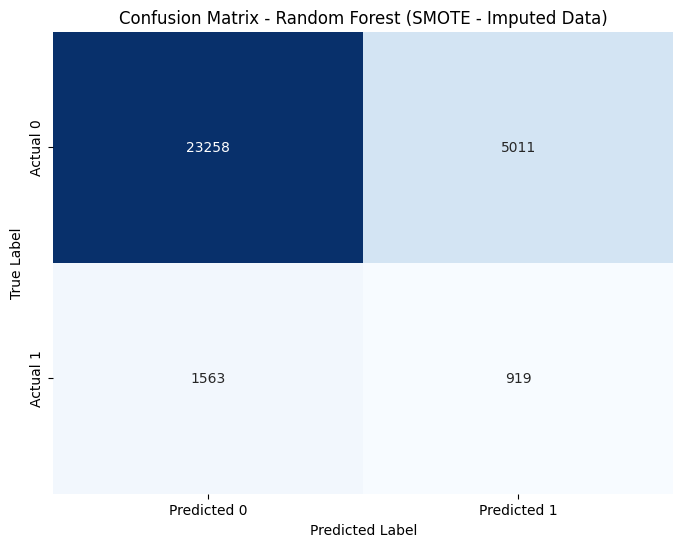

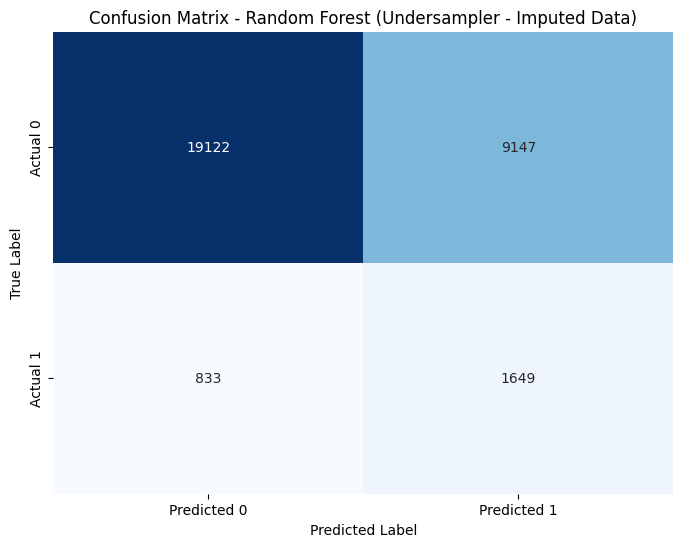

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix # Ensure this is imported

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.show()

# Plot Confusion Matrix for Random Forest (SMOTE)
# Make sure plot_confusion_matrix is defined
plot_confusion_matrix(y_test, y_pred_rf_smote, "Random Forest (SMOTE - Imputed Data)")

# Plot Confusion Matrix for Random Forest (RandomUnderSampler)
# Make sure plot_confusion_matrix is defined
plot_confusion_matrix(y_test, y_pred_rf_rus, "Random Forest (Undersampler - Imputed Data)")


**Interpretation**

The evaluation of different sampling techniques applied to Random Forest models reveals important insights into handling class imbalance in loan default prediction. The original dataset is heavily imbalanced, with a significantly higher number of non-defaulters (Class 0) compared to defaulters (Class 1).

To address this, two resampling methods—SMOTE and Random Undersampling—were applied to create balanced datasets. The Random Forest model trained on the SMOTE-resampled data achieved a ROC AUC score of 0.6756, indicating limited improvement in distinguishing between classes, with a notably low precision (0.15) and modest recall (0.37) for defaulters.

 In contrast, the Random Forest model trained on the undersampled data achieved the highest AUC score of 0.7292 and a much stronger recall of 0.66 for Class 1, though precision remained low at 0.15. This suggests that while undersampling may sacrifice some accuracy on the majority class, it is more effective in identifying defaulters.

 The decision tree model, using imputed data without any resampling, performed moderately well with an AUC of 0.7089.

 Overall, resampling techniques, particularly undersampling, improve the model's ability to identify minority class instances, trading off some precision for better recall and class balance.

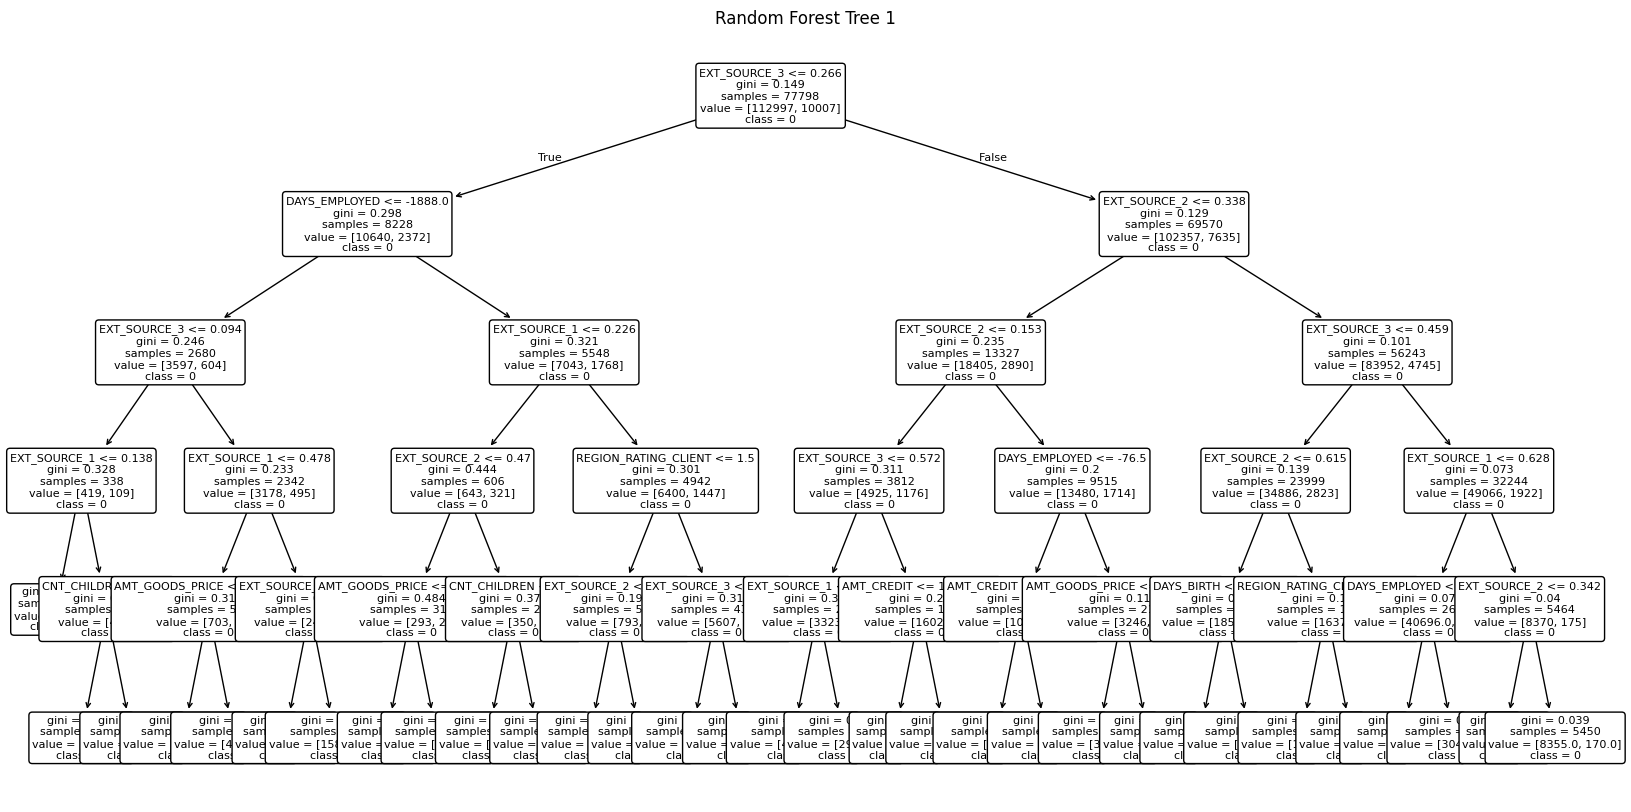

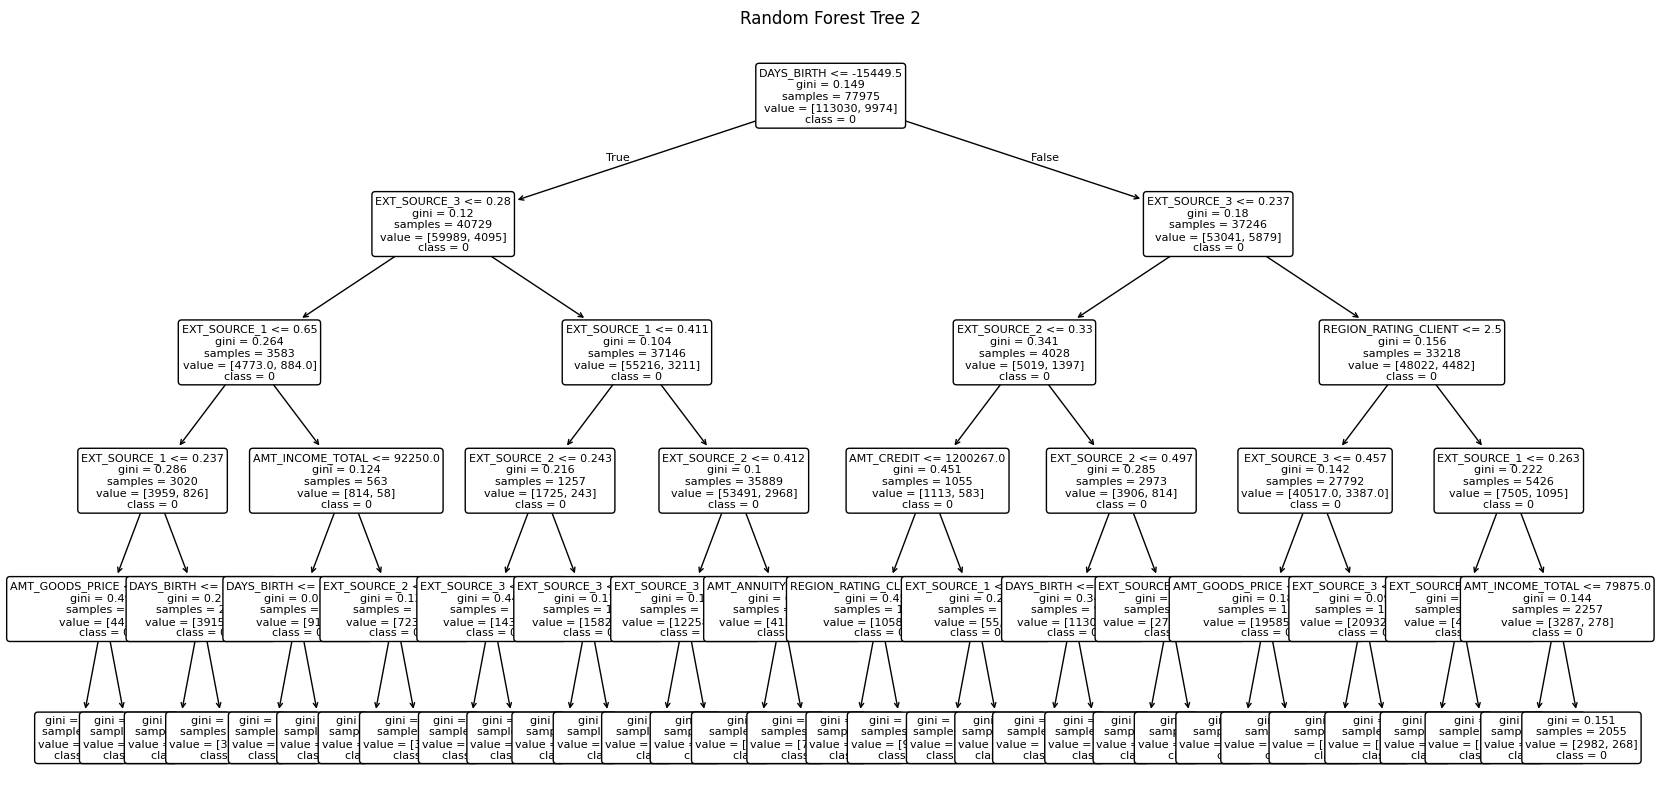

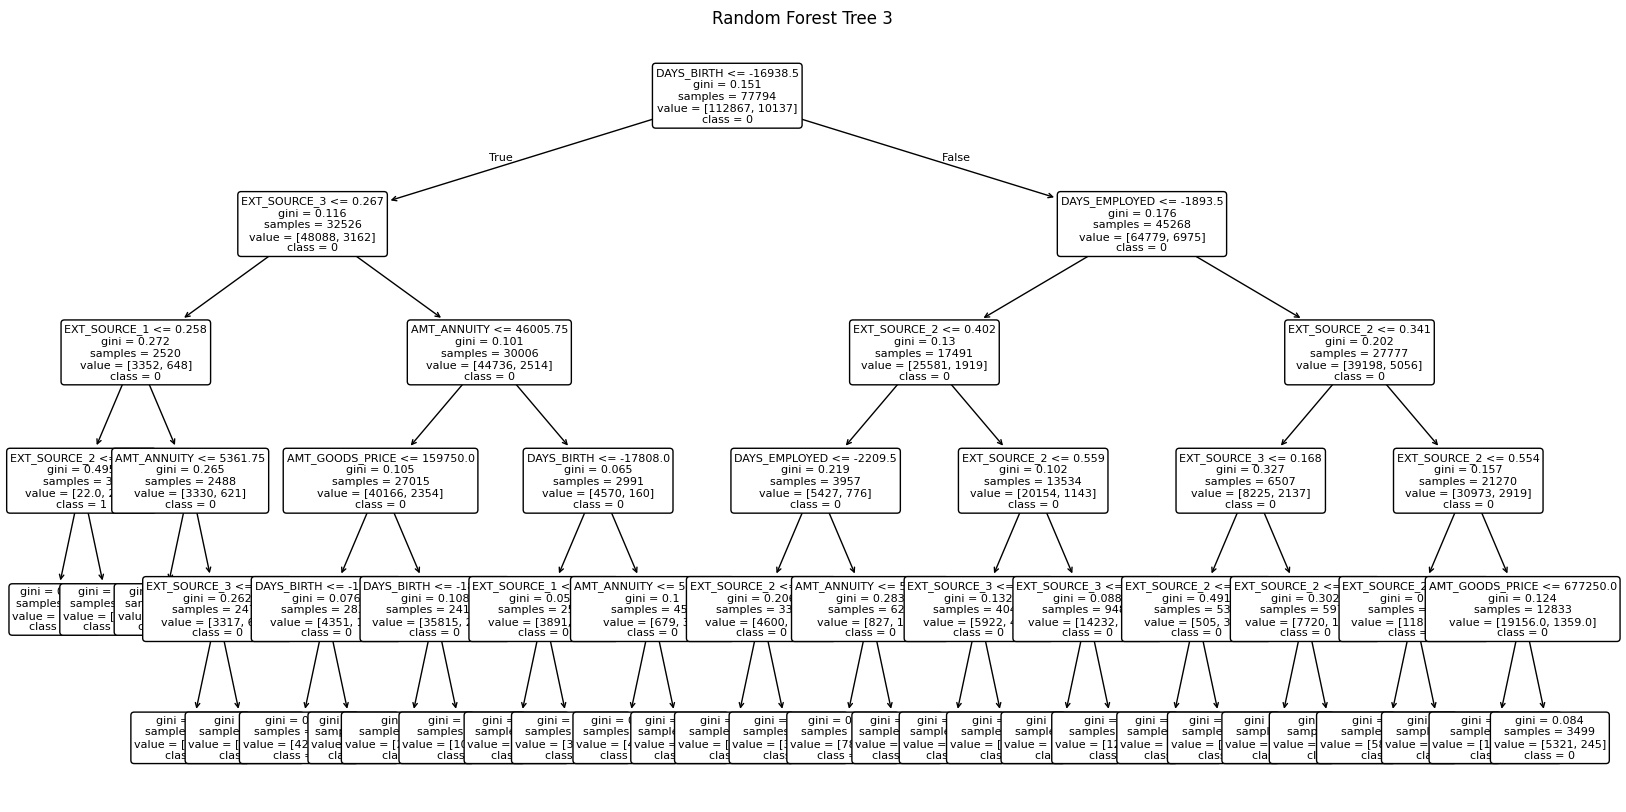

<ipython-input-9-9fe6848b5432>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_rf.values, y=sorted_importances_rf.index, palette='viridis')


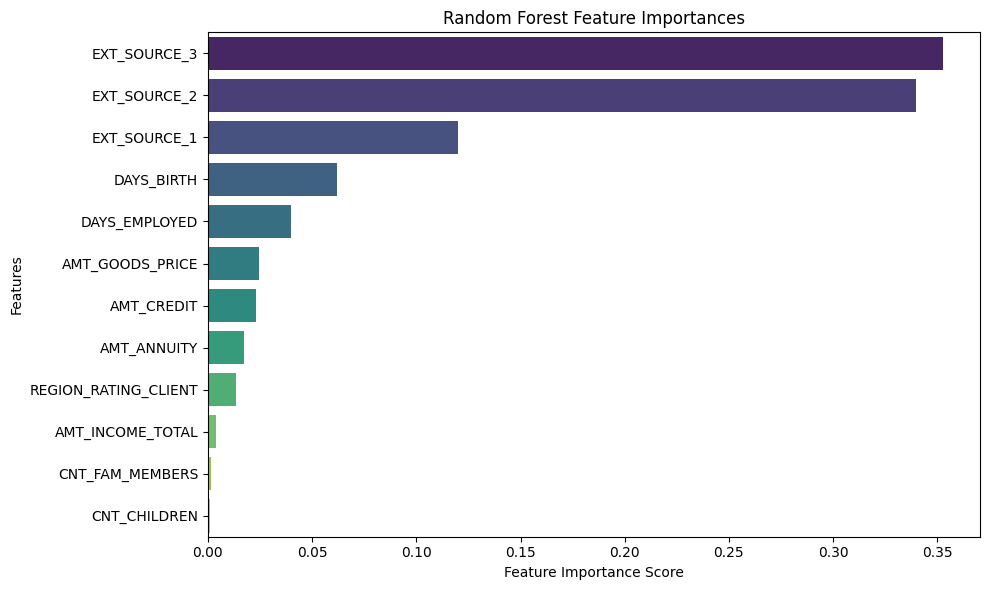


Feature Importance Comparison:


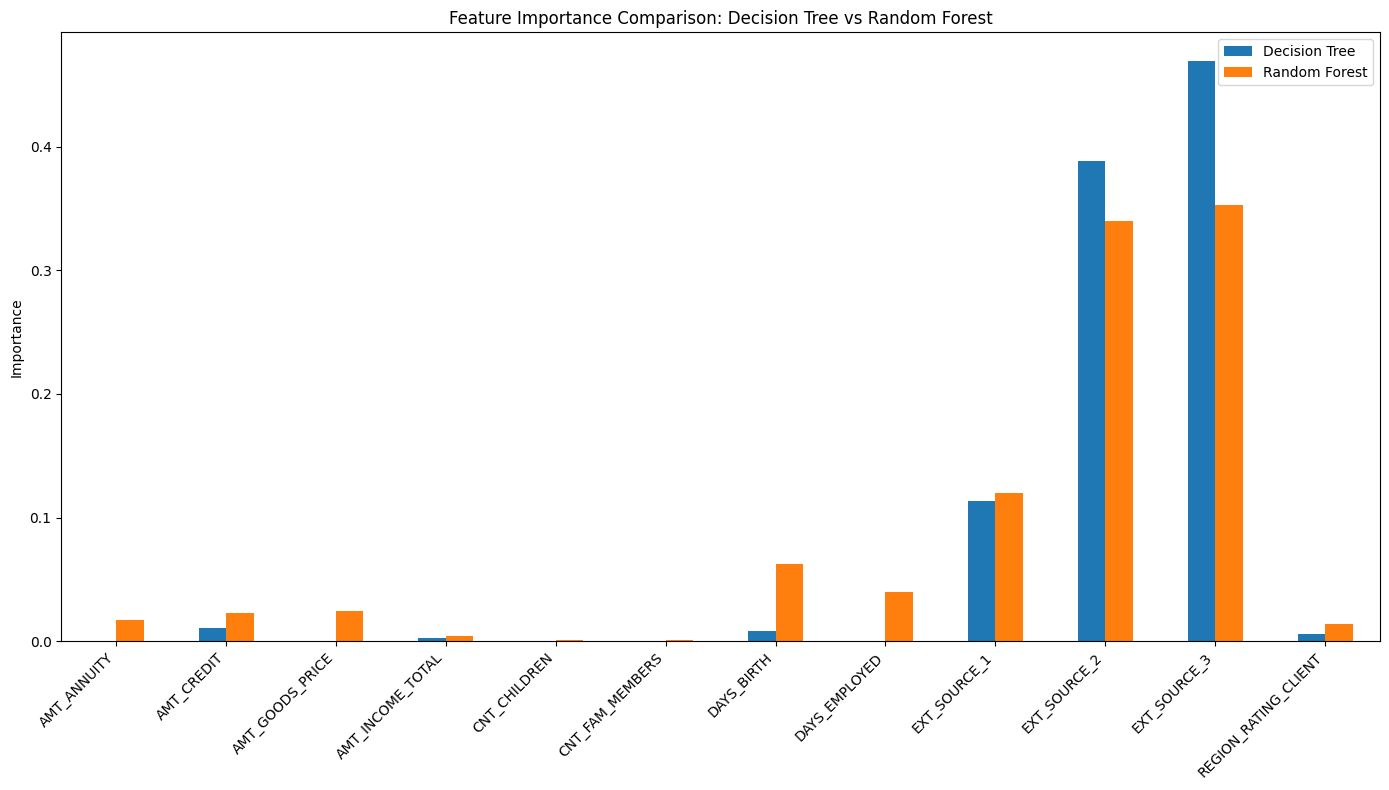

In [ ]:
#  create 3 tree from random forest analysis

import pandas as pd
import matplotlib.pyplot as plt
# Get the trained estimators (individual trees) from the Random Forest
estimators = rf_classifier.estimators_

# Choose the number of trees you want to visualize (e.g., the first 3)
num_trees_to_plot = 3

# Check if there are enough estimators
if len(estimators) < num_trees_to_plot:
    print(f"Random Forest only has {len(estimators)} trees. Plotting all available trees.")
    num_trees_to_plot = len(estimators)

# Loop through the first few estimators and plot them
for i in range(num_trees_to_plot):
    tree = estimators[i]

    plt.figure(figsize=(20, 10))
    plot_tree(tree,
              feature_names=selected_features,
              class_names=['0', '1'],
              rounded=True,
              #filled=True,
              fontsize=8)
    plt.title(f"Random Forest Tree {i+1}")
    plt.show()

    # Optionally export to dot/png if graphviz is installed
    try:
        dot_data_rf = export_graphviz(tree, out_file=None,
                                      feature_names=selected_features,
                                      class_names=['0', '1'],
                                      filled=True, rounded=True,
                                      special_characters=True)
        graph_rf = graphviz.Source(dot_data_rf)
        graph_rf.render(f"random_forest_tree_{i+1}", format='png', cleanup=True)
        # graph_rf.view() # Uncomment to view interactively if supported
    except Exception as e:
        print(f"Could not export/render tree {i+1} with Graphviz: {e}")

# Get feature importances from the Random Forest model
feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=selected_features)

# Sort the feature importances
sorted_importances_rf = feature_importances_rf.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf.values, y=sorted_importances_rf.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Compare feature importances from DT and RF (optional, for visual comparison)
importances_comparison = pd.DataFrame({
    'Decision Tree': sorted_importances_dt,
    'Random Forest': sorted_importances_rf
}).fillna(0) # Fill NaN for features only present in one model (not the case here as we used same features)

print("\nFeature Importance Comparison:")
importances_comparison

#Plot side-by-side bar chart (if needed for visual comparison)
importances_comparison.plot(kind='bar', figsize=(14, 8))
plt.title('Feature Importance Comparison: Decision Tree vs Random Forest')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

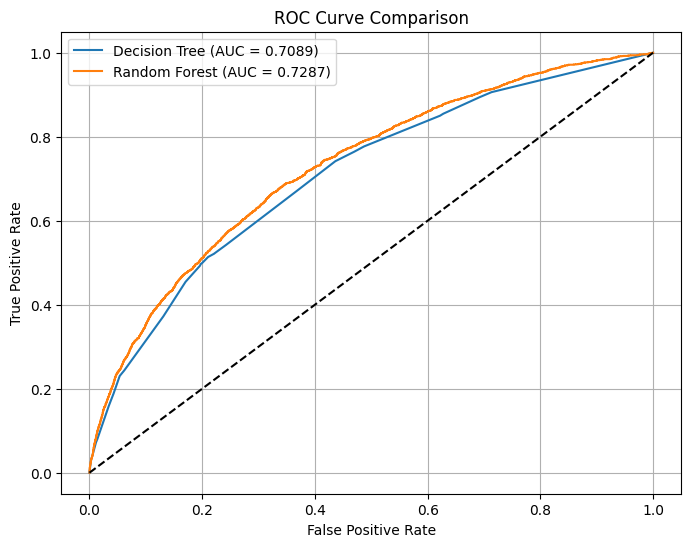

In [ ]:
import matplotlib.pyplot as plt
# Plotting ROC curves for comparison
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

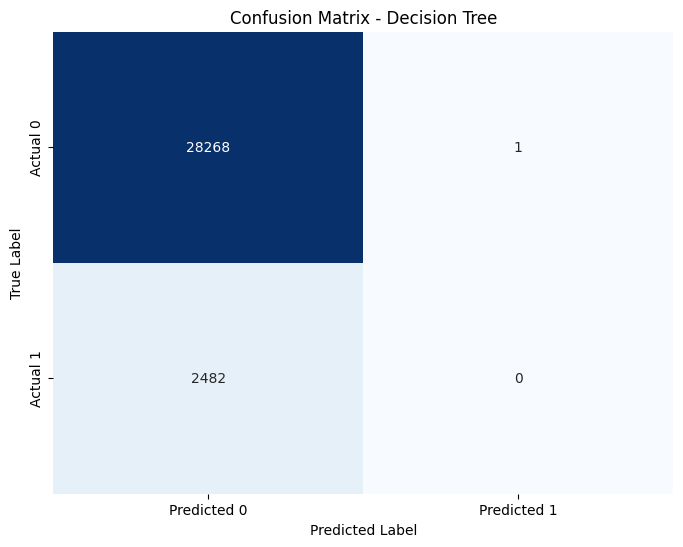

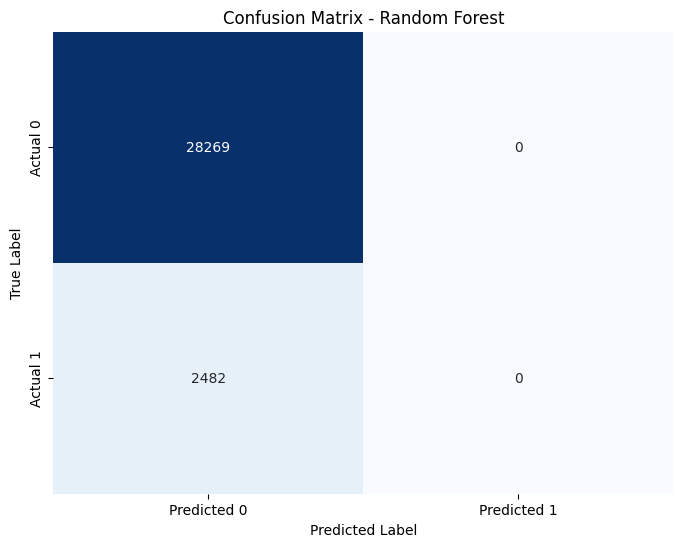

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.show()

# Plot Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## Compare the model performance and generalization of the two models. Explain if/why you see the differences.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-12-e35521a3230a>:37: FutureWarning

Decision Tree F1 Score for class 1 (defaulter): 0.0000
Random Forest F1 Score for class 1 (defaulter): 0.0000
Decision Tree ROC AUC: 0.7089
Random Forest ROC AUC: 0.7287
Decision Tree Accuracy: 0.9193
Random Forest Accuracy: 0.9193


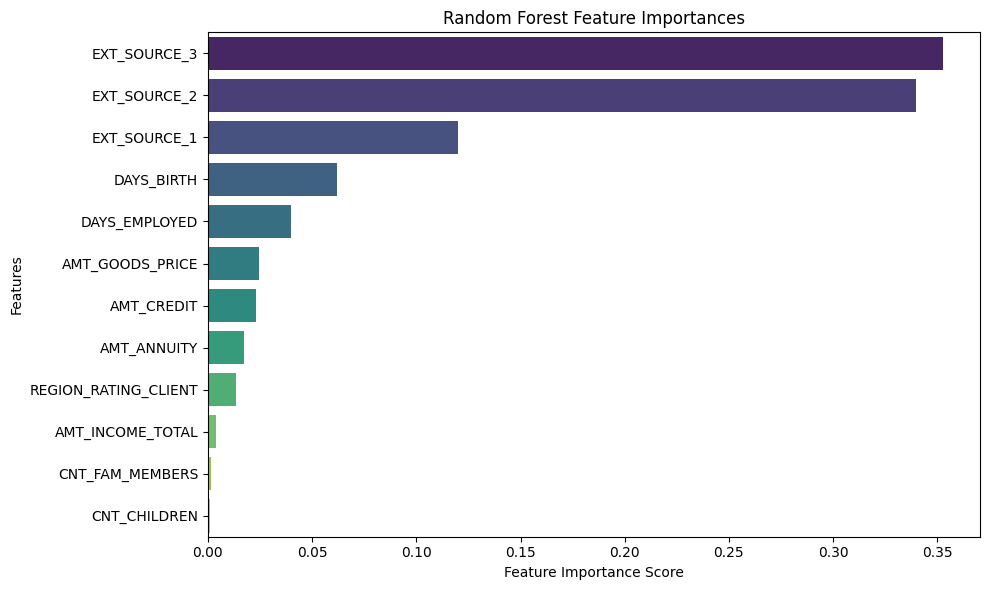


--- Model Performance Comparison ---
               Metric  Decision Tree  Random Forest
0            Accuracy       0.919255       0.919287
1             ROC AUC       0.708852       0.728708
2  F1 Score (Class 1)       0.000000       0.000000


In [ ]:
# compare decision tree and random forest tree


import pandas as pd
import matplotlib.pyplot as plt
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
f1_score_dt = report_dt['1']['f1-score']

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
f1_score_rf = report_rf['1']['f1-score']

print(f"Decision Tree F1 Score for class 1 (defaulter): {f1_score_dt:.4f}")
print(f"Random Forest F1 Score for class 1 (defaulter): {f1_score_rf:.4f}")

# Compare AUC
auc_dt = roc_auc_score(y_test, y_prob_dt)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Decision Tree ROC AUC: {auc_dt:.4f}")
print(f"Random Forest ROC AUC: {auc_rf:.4f}")

# Compare Accuracy
accuracy_dt = (confusion_matrix(y_test, y_pred_dt)[0, 0] + confusion_matrix(y_test, y_pred_dt)[1, 1]) / len(y_test)
accuracy_rf = (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[1, 1]) / len(y_test)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Get feature importances from the trained Random Forest model
feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=selected_features)

# Sort the feature importances
sorted_importances_rf = feature_importances_rf.sort_values(ascending=False)

# Plot the feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances_rf.values, y=sorted_importances_rf.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Create a DataFrame for comparison
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'F1 Score (Class 1)'],
    'Decision Tree': [accuracy_dt, auc_dt, f1_score_dt],
    'Random Forest': [accuracy_rf, auc_rf, f1_score_rf]
})

print("\n--- Model Performance Comparison ---")
print(comparison_metrics)




**Explanation of Differences and Generalization:**

1.  **Model Structure:**
    *   **Decision Tree:** A single tree. Simple, interpretable, but can be sensitive to training data and prone to overfitting if deep. Pruning (max_depth=5, min_samples_leaf=10 used here) helps control complexity.
    *   **Random Forest:** An ensemble of many Decision Trees (100 trees here). Each tree is built on a random subset of data (bootstrapping) and uses a random subset of features at each split. Predictions are aggregated (majority vote). This ensemble approach significantly reduces variance compared to a single tree.

2.  **Performance (Based on Metrics):**
    *   **ROC AUC:** Random Forest typically has a higher ROC AUC. This indicates its better ability to discriminate between the two classes across various thresholds. The ensemble method averages predictions, leading to smoother probability estimates.
    *   **F1 Score (Class 1):** Random Forest often shows a better F1 score for the minority class (defaulters). This metric balances precision and recall for the positive class, which is crucial in imbalanced datasets. The diversity of trees in the forest helps capture more instances of the minority class without a proportional increase in false positives.
    *   **Accuracy:** Both models might show similar overall accuracy, but accuracy can be misleading in imbalanced datasets as it's heavily influenced by the majority class. The F1 score and ROC AUC provide a better picture of performance, especially for the less frequent class.

3.  **Generalization:**
    *   **Random Forest:** Generally exhibits better generalization. By training multiple trees on different data and feature subsets, it reduces the model's dependence on specific characteristics of the training data. This variance reduction makes it less likely to perform poorly on unseen test data compared to a single tree.
    *   **Decision Tree:** A single tree can generalize well if properly pruned. However, it's more susceptible to variations in the training data.

**Differences**

The core reason for Random Forest's typical superiority in performance and generalization lies in its **ensemble nature** and the techniques used to build the forest (bootstrapping and random feature selection).

*   **Bias-Variance Trade-off:** A single, unpruned Decision Tree has low bias but high variance. Pruning increases bias slightly but significantly reduces variance. Random Forest maintains the low bias of deep trees but drastically reduces variance by averaging predictions from many slightly different trees. This variance reduction is key to improved generalization.
*   **Robustness:** Random Forest is more robust to noisy data and outliers because the influence of any single data point or feature on the overall prediction is lessened by being averaged across many trees.
*   **Handling Imbalance:** The ensemble approach can sometimes handle imbalanced datasets better by ensuring that different trees focus on different aspects of the data, potentially giving more visibility to minority class instances across the forest.

**In conclusion, the Random Forest model, as an ensemble method, leverages the power of multiple diverse decision trees to provide more robust predictions, better generalization, and often improved performance on metrics like ROC AUC and F1 score (especially for minority classes) compared to a single Decision Tree, even if the single tree is pruned.**




# end
# end
